# Chicago Indicators

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/luisangelmendozavelasco.github.io/blob/master/_portfolio/Data_Engineering_Foundations_Specialization/portfolio-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>

**Objective**: Analyze real-world datasets from the city of Chicago using SQLite and Python.

## Import libraries

In [1]:
import pandas as pd
import sqlite3
import folium
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Load the dataset

In [2]:
con = sqlite3.connect(":memory:")
cur = con.cursor()

In [3]:
census_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCensusData.csv"
schools_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoPublicSchools.csv"
crime_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCrimeData.csv"

df_census = pd.read_csv(census_url)
df_schools = pd.read_csv(schools_url)
df_crime = pd.read_csv(crime_url)

df_census.to_sql("CENSUS_DATA", con, if_exists='replace', index=False, method="multi")
df_schools.to_sql("CHICAGO_PUBLIC_SCHOOLS", con, if_exists='replace', index=False, method="multi")
df_crime.to_sql("CHICAGO_CRIME_DATA", con, if_exists='replace', index=False, method="multi");

In [4]:
df_census.head()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [5]:
df_schools.head()

,School_ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,...,Freshman_on_Track_Rate__,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police_District,Location
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,NDA,1171699.458,1915829.428,41.924497,-87.644522,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressRep...,Skyway Elementary Network,...,NDA,1196129.985,1856209.466,41.760324,-87.556736,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
2,610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressRep...,Midway Elementary Network,...,NDA,1148427.165,1851012.215,41.747111,-87.731702,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"
3,609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,(773) 535-4389,http://schoolreports.cps.edu/SchoolProgressRep...,Pershing Elementary Network,...,NDA,1164504.290,1873959.199,41.809757,-87.672145,61,NEW CITY,20,9,"(41.8097569, -87.6721446)"
4,610513,Air Force Academy High School,HS,3630 S Wells St,Chicago,IL,60609,(773) 535-1590,http://schoolreports.cps.edu/SchoolProgressRep...,Southwest Side High School Network,...,91.8,1175177.622,1880745.126,41.828146,-87.632794,34,ARMOUR SQUARE,11,9,"(41.82814609, -87.63279369)"


In [6]:
df_crime.head()

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,...,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,...,9,14.0,58.0,6,1155838.0,1873050.0,2004,41.807440,-87.703956,"(41.8074405, -87.703955849)"
1,3406613,HK456306,2004-06-26,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,...,11,27.0,23.0,6,1152206.0,1906127.0,2004,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,8002131,HT233595,2011-04-04,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,...,2,3.0,38.0,6,1177436.0,1876313.0,2011,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,2010-12-30,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,4,7.0,46.0,6,1194622.0,1850125.0,2010,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,2016-02-02,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,...,8,15.0,66.0,6,1155240.0,1860661.0,2016,41.773455,-87.706480,"(41.773455295, -87.706480471)"


## Understand the dataset

There are three datasets that are available on the [Chicago Data Portal](https://data.cityofchicago.org/):

### 1. Socioeconomic Indicators in Chicago

This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

A detailed description of this dataset and the original dataset can be obtained from the Chicago Data Portal at this [link](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2).

In [7]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   COMMUNITY_AREA_NUMBER                         77 non-null     float64
 1   COMMUNITY_AREA_NAME                           78 non-null     object 
 2   PERCENT_OF_HOUSING_CROWDED                    78 non-null     float64
 3   PERCENT_HOUSEHOLDS_BELOW_POVERTY              78 non-null     float64
 4   PERCENT_AGED_16__UNEMPLOYED                   78 non-null     float64
 5   PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA  78 non-null     float64
 6   PERCENT_AGED_UNDER_18_OR_OVER_64              78 non-null     float64
 7   PER_CAPITA_INCOME                             78 non-null     int64  
 8   HARDSHIP_INDEX                                77 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ KB


### 2. Chicago Public Schools

This dataset shows all school level performance data used to create CPS School Report Cards for the 2011-2012 school year. This dataset is provided by the city of Chicago's Data Portal.

A detailed description of this dataset and the original dataset can be obtained from the Chicago Data Portal at this [link](https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t).

In [8]:
df_schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 78 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   School_ID                                         566 non-null    int64  
 1   NAME_OF_SCHOOL                                    566 non-null    object 
 2   Elementary, Middle, or High School                566 non-null    object 
 3   Street_Address                                    566 non-null    object 
 4   City                                              566 non-null    object 
 5   State                                             566 non-null    object 
 6   ZIP_Code                                          566 non-null    int64  
 7   Phone_Number                                      566 non-null    object 
 8   Link                                              565 non-null    object 
 9   Network_Manager      

### 3. Chicago Crime Data

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days.

A detailed description of this dataset and the original dataset can be obtained from the Chicago Data Portal at this [link](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2).

In [9]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     533 non-null    int64  
 1   CASE_NUMBER            533 non-null    object 
 2   DATE                   533 non-null    object 
 3   BLOCK                  533 non-null    object 
 4   IUCR                   533 non-null    object 
 5   PRIMARY_TYPE           533 non-null    object 
 6   DESCRIPTION            533 non-null    object 
 7   LOCATION_DESCRIPTION   533 non-null    object 
 8   ARREST                 533 non-null    bool   
 9   DOMESTIC               533 non-null    bool   
 10  BEAT                   533 non-null    int64  
 11  DISTRICT               533 non-null    int64  
 12  WARD                   490 non-null    float64
 13  COMMUNITY_AREA_NUMBER  490 non-null    float64
 14  FBICODE                533 non-null    object 
 15  X_COOR

## Visualize the location of public schools and where crimes occurred

The red markers represent where crimes occurred, while the blue markers represent the location of public schools.

In [10]:
map = folium.Map(location=[41.88, -87.62], zoom_start=12)
feature_group = folium.FeatureGroup()

for point in list(df_schools[["Latitude", "Longitude"]].dropna().to_numpy()):
    feature_group.add_child(folium.Marker(point, popup='School', icon=folium.Icon(color='blue')))

for point in list(df_crime[["LATITUDE", "LONGITUDE"]].dropna().to_numpy()):
    feature_group.add_child(folium.Marker(point, popup='Crime', icon=folium.Icon(color='red')))

map.add_child(feature_group)
map

## Analysis

### What percentage of community areas in Chicago have a hardship index greater than 50?

In [11]:
query = """
            SELECT (COUNT(CASE WHEN HARDSHIP_INDEX > 50 THEN 1 END) * 100 / COUNT(*)) || '%' AS Percentage
            FROM CENSUS_DATA
        """

pd.read_sql_query(query, con)

,Percentage
0,48%


### What are the community areas with the highest and lowest hardship index?

In [12]:
query = """
            SELECT COMMUNITY_AREA_NAME,  HARDSHIP_INDEX
            FROM CENSUS_DATA
            WHERE HARDSHIP_INDEX IN ((SELECT MAX(HARDSHIP_INDEX) FROM CENSUS_DATA),
                                     (SELECT MIN(HARDSHIP_INDEX) FROM CENSUS_DATA))
        """

pd.read_sql_query(query, con)

,COMMUNITY_AREA_NAME,HARDSHIP_INDEX
0,Near North Side,1.0
1,Riverdale,98.0


### Which Chicago community areas have per-capita incomes greater than $50,000?

In [13]:
query = """
            SELECT COMMUNITY_AREA_NAME, PER_CAPITA_INCOME
            FROM CENSUS_DATA
            WHERE PER_CAPITA_INCOME > 50000
            ORDER BY PER_CAPITA_INCOME DESC
        """

pd.read_sql_query(query, con)

,COMMUNITY_AREA_NAME,PER_CAPITA_INCOME
0,Near North Side,88669
1,Lincoln Park,71551
2,Loop,65526
3,Lake View,60058
4,Near South Side,59077
5,North Center,57123


### What is the relationship between the `PER_CAPITA_INCOME` and `HARDSHIP_INDEX` features?

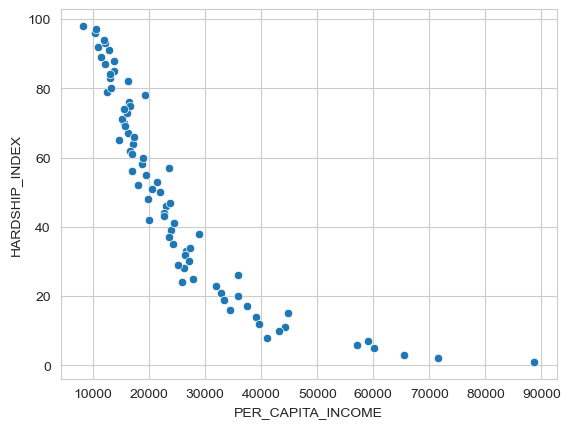

In [14]:
query = """
            SELECT PER_CAPITA_INCOME, HARDSHIP_INDEX
            FROM CENSUS_DATA
        """

plt.figure()
sns.scatterplot(x="PER_CAPITA_INCOME", y="HARDSHIP_INDEX", data=pd.read_sql_query(query, con))
plt.show()


### How many schools of each type are in the dataset?

In [15]:
query = """
            SELECT "Elementary, Middle, or High School", COUNT(*) 
            FROM CHICAGO_PUBLIC_SCHOOLS 
            GROUP BY "Elementary, Middle, or High School"
        """

pd.read_sql_query(query, con)

,"Elementary, Middle, or High School",COUNT(*)
0,ES,462
1,HS,93
2,MS,11


### Which schools have the highest and lowest safety scores?

In [16]:
query = """
            SELECT NAME_OF_SCHOOL, SAFETY_SCORE
            FROM CHICAGO_PUBLIC_SCHOOLS
            WHERE SAFETY_SCORE IN ((SELECT MAX(SAFETY_SCORE) FROM CHICAGO_PUBLIC_SCHOOLS),
                                   (SELECT MIN(SAFETY_SCORE) FROM CHICAGO_PUBLIC_SCHOOLS))
            ORDER BY SAFETY_SCORE ASC
        """

pd.read_sql_query(query, con)

,NAME_OF_SCHOOL,SAFETY_SCORE
0,Edmond Burke Elementary School,1.0
1,Abraham Lincoln Elementary School,99.0
2,Alexander Graham Bell Elementary School,99.0
3,Annie Keller Elementary Gifted Magnet School,99.0
4,Augustus H Burley Elementary School,99.0
5,Edgar Allan Poe Elementary Classical School,99.0
6,Edgebrook Elementary School,99.0
7,Ellen Mitchell Elementary School,99.0
8,James E McDade Elementary Classical School,99.0
9,James G Blaine Elementary School,99.0


### What are the five schools with the lowest safety scores?

In [17]:
query = """
            SELECT NAME_OF_SCHOOL, SAFETY_SCORE 
            FROM CHICAGO_PUBLIC_SCHOOLS
            WHERE SAFETY_SCORE IS NOT NULL
            ORDER BY SAFETY_SCORE ASC
            LIMIT 5
        """

pd.read_sql_query(query, con)

,NAME_OF_SCHOOL,SAFETY_SCORE
0,Edmond Burke Elementary School,1.0
1,Luke O'Toole Elementary School,5.0
2,George W Tilton Elementary School,6.0
3,Foster Park Elementary School,11.0
4,Emil G Hirsch Metropolitan High School,13.0


### What are the five schools with the highest average student attendance?

In [18]:
query = """ 
            SELECT NAME_OF_SCHOOL, AVERAGE_STUDENT_ATTENDANCE
            FROM CHICAGO_PUBLIC_SCHOOLS
            ORDER BY AVERAGE_STUDENT_ATTENDANCE DESC
            LIMIT 5
        """

pd.read_sql_query(query, con)

,NAME_OF_SCHOOL,AVERAGE_STUDENT_ATTENDANCE
0,John Charles Haines Elementary School,98.40%
1,James Ward Elementary School,97.80%
2,Edgar Allan Poe Elementary Classical School,97.60%
3,Orozco Fine Arts & Sciences Elementary School,97.60%
4,Rachel Carson Elementary School,97.60%


### Which schools have average student attendance lower than 70%?

In [19]:
query = """ 
            SELECT NAME_OF_SCHOOL, AVERAGE_STUDENT_ATTENDANCE
            FROM CHICAGO_PUBLIC_SCHOOLS
            WHERE AVERAGE_STUDENT_ATTENDANCE < 70
            ORDER BY AVERAGE_STUDENT_ATTENDANCE
        """

pd.read_sql_query(query, con)

,NAME_OF_SCHOOL,AVERAGE_STUDENT_ATTENDANCE
0,Richard T Crane Technical Preparatory High School,57.90%
1,Barbara Vick Early Childhood & Family Center,60.90%
2,Dyett High School,62.50%
3,Wendell Phillips Academy High School,63.00%
4,Orr Academy High School,66.30%
5,Manley Career Academy High School,66.80%
6,Chicago Vocational Career Academy High School,68.80%
7,Roberto Clemente Community Academy High School,69.60%


### What is the hardship index for the five community areas with the lowest college enrollment?

In [20]:
query = """ 
            SELECT CENSUS_DATA.COMMUNITY_AREA_NAME, HARDSHIP_INDEX, SUM(COLLEGE_ENROLLMENT)
            FROM CENSUS_DATA, CHICAGO_PUBLIC_SCHOOLS
            WHERE CENSUS_DATA.COMMUNITY_AREA_NUMBER = CHICAGO_PUBLIC_SCHOOLS.COMMUNITY_AREA_NUMBER
            GROUP BY CENSUS_DATA.COMMUNITY_AREA_NAME
            ORDER BY SUM(COLLEGE_ENROLLMENT) ASC
            LIMIT 5
        """

pd.read_sql_query(query, con)

,COMMUNITY_AREA_NAME,HARDSHIP_INDEX,SUM(COLLEGE_ENROLLMENT)
0,Oakland,78.0,140
1,Fuller Park,97.0,531
2,Burnside,79.0,549
3,O'Hare,24.0,786
4,Loop,3.0,871


### What is the hardship index for the five community areas with the highest total college enrollment?

In [21]:
query = """ 
            SELECT CENSUS_DATA.COMMUNITY_AREA_NAME, HARDSHIP_INDEX, SUM(COLLEGE_ENROLLMENT)
            FROM CENSUS_DATA, CHICAGO_PUBLIC_SCHOOLS
            WHERE CENSUS_DATA.COMMUNITY_AREA_NUMBER = CHICAGO_PUBLIC_SCHOOLS.COMMUNITY_AREA_NUMBER
            GROUP BY CENSUS_DATA.COMMUNITY_AREA_NAME
            ORDER BY SUM(COLLEGE_ENROLLMENT) DESC
            LIMIT 5
        """

pd.read_sql_query(query, con)

,COMMUNITY_AREA_NAME,HARDSHIP_INDEX,SUM(COLLEGE_ENROLLMENT)
0,South Lawndale,96.0,14793
1,Belmont Cragin,70.0,14386
2,Austin,73.0,10933
3,Gage Park,93.0,9915
4,Brighton Park,84.0,9647


### What are the community areas with per-capita income less than $11,000?

In [22]:
query = """
            SELECT COMMUNITY_AREA_NAME, PER_CAPITA_INCOME
            FROM CENSUS_DATA
            WHERE PER_CAPITA_INCOME < 11000
        """

pd.read_sql_query(query, con)

,COMMUNITY_AREA_NAME,PER_CAPITA_INCOME
0,West Garfield Park,10934
1,South Lawndale,10402
2,Fuller Park,10432
3,Riverdale,8201


### What are the case numbers for crimes involving minors?

In [23]:
query = """
            SELECT CASE_NUMBER, DESCRIPTION
            FROM CHICAGO_CRIME_DATA
            WHERE DESCRIPTION LIKE '%MINOR%'     
        """

pd.read_sql_query(query, con)

,CASE_NUMBER,DESCRIPTION
0,HL266884,SELL/GIVE/DEL LIQUOR TO MINOR
1,HK238408,ILLEGAL CONSUMPTION BY MINOR


### What are the kidnapping crimes involving a child?

In [24]:
query = """
            SELECT CASE_NUMBER, PRIMARY_TYPE, DESCRIPTION
            FROM CHICAGO_CRIME_DATA
            WHERE PRIMARY_TYPE == "KIDNAPPING" AND DESCRIPTION LIKE '%CHILD%'    
        """

pd.read_sql_query(query, con)

,CASE_NUMBER,PRIMARY_TYPE,DESCRIPTION
0,HN144152,KIDNAPPING,CHILD ABDUCTION/STRANGER


### What kind of crimes were recorded in schools?

In [25]:
query = """
            SELECT PRIMARY_TYPE, LOCATION_DESCRIPTION
            FROM CHICAGO_CRIME_DATA
            WHERE LOCATION_DESCRIPTION LIKE '%SCHOOL%'   
        """

pd.read_sql_query(query, con)

,PRIMARY_TYPE,LOCATION_DESCRIPTION
0,BATTERY,"SCHOOL, PUBLIC, GROUNDS"
1,BATTERY,"SCHOOL, PUBLIC, BUILDING"
2,BATTERY,"SCHOOL, PUBLIC, BUILDING"
3,BATTERY,"SCHOOL, PUBLIC, BUILDING"
4,BATTERY,"SCHOOL, PUBLIC, GROUNDS"
5,CRIMINAL DAMAGE,"SCHOOL, PUBLIC, GROUNDS"
6,NARCOTICS,"SCHOOL, PUBLIC, GROUNDS"
7,NARCOTICS,"SCHOOL, PUBLIC, BUILDING"
8,ASSAULT,"SCHOOL, PUBLIC, GROUNDS"
9,CRIMINAL TRESPASS,"SCHOOL, PUBLIC, GROUNDS"


### What is the average safety score for each type of school?

In [26]:
query = """
            SELECT "Elementary, Middle, or High School", AVG(SAFETY_SCORE)
            FROM CHICAGO_PUBLIC_SCHOOLS
            GROUP BY "Elementary, Middle, or High School"
        """

pd.read_sql_query(query, con)

,"Elementary, Middle, or High School",AVG(SAFETY_SCORE)
0,ES,49.520384
1,HS,49.623529
2,MS,48.000000


### What are the five community areas with the highest percentage of households below the poverty line?

In [27]:
query = """
            SELECT COMMUNITY_AREA_NAME, PERCENT_HOUSEHOLDS_BELOW_POVERTY
            FROM CENSUS_DATA
            ORDER BY PERCENT_HOUSEHOLDS_BELOW_POVERTY DESC 
            LIMIT 5
        """

pd.read_sql_query(query, con)

,COMMUNITY_AREA_NAME,PERCENT_HOUSEHOLDS_BELOW_POVERTY
0,Riverdale,56.5
1,Fuller Park,51.2
2,Englewood,46.6
3,North Lawndale,43.1
4,East Garfield Park,42.4


### Which community areas are the most crime prone?

In [28]:
query = """
            SELECT CENSUS_DATA.COMMUNITY_AREA_NAME, COUNT(CHICAGO_CRIME_DATA.COMMUNITY_AREA_NUMBER) AS FREQUENCY
            FROM CHICAGO_CRIME_DATA, CENSUS_DATA
            WHERE CHICAGO_CRIME_DATA.COMMUNITY_AREA_NUMBER == CENSUS_DATA.COMMUNITY_AREA_NUMBER
            GROUP BY CHICAGO_CRIME_DATA.COMMUNITY_AREA_NUMBER
            ORDER BY FREQUENCY DESC 
            LIMIT 5
        """

pd.read_sql_query(query, con)

,COMMUNITY_AREA_NAME,FREQUENCY
0,Austin,43
1,Humboldt park,22
2,Englewood,21
3,North Lawndale,16
4,Near West Side,16


### Which community areas have the lowest number of crimes?

In [29]:
query = """
            SELECT CENSUS_DATA.COMMUNITY_AREA_NAME, COUNT(CHICAGO_CRIME_DATA.COMMUNITY_AREA_NUMBER) AS FREQUENCY
            FROM CHICAGO_CRIME_DATA, CENSUS_DATA
            WHERE CHICAGO_CRIME_DATA.COMMUNITY_AREA_NUMBER == CENSUS_DATA.COMMUNITY_AREA_NUMBER
            GROUP BY CHICAGO_CRIME_DATA.COMMUNITY_AREA_NUMBER
            ORDER BY FREQUENCY ASC
            LIMIT 5
        """

pd.read_sql_query(query, con)

,COMMUNITY_AREA_NAME,FREQUENCY
0,Forest Glen,1
1,Near South Side,1
2,Burnside,1
3,Hegewisch,1
4,Bridgeport,1
